I.

I show how Employee Dimension changes over time using SCD Types 0, 1, 2, 3, 4, and 6. Then I will use the given data for the two employees (Adam and Ben) and simulate how their salary attribute changes.

In [ ]:
import pandas as pd

**SCD 0**

Changes are not allowed. Even if the employee’s salary changes, it keeps the original values only.

In [ ]:
data_type0 = {
    'EmployeeID': ['A1', 'B2'],
    'Name': ['Adam', 'Ben'],
    'Salary': [3900, 4000]
}
df_type0 = pd.DataFrame(data_type0)
df_type0

,EmployeeID,Name,Salary
0,A1,Adam,3900
1,B2,Ben,4000


**SCD 1**

The old data is overwritten. Only the latest salary is stored in the table.

In [ ]:
data_type1 = {
    'EmployeeID': ['A1', 'B2'],
    'Name': ['Adam', 'Ben'],
    'Salary': [5500, 4750]
}
df_type1 = pd.DataFrame(data_type1)
df_type1

,EmployeeID,Name,Salary
0,A1,Adam,5500
1,B2,Ben,4750


**SCD 2**

It keeps historical data by adding a new row whenever a change occurs.  

In [ ]:
data_type2 = {
    'EmployeeID': ['A1', 'A1', 'A1', 'A1', 'B2', 'B2'],
    'Name': ['Adam', 'Adam', 'Adam', 'Adam', 'Ben', 'Ben'],
    'Salary': [3900, 4300, 5000, 5500, 4000, 4750],
    'EffectiveDate': ['2016-03-01', '2016-05-31', '2017', '2017-07-01', '2017-02-01', '2017-05-31']

}
df_type2 = pd.DataFrame(data_type2)
df_type2

,EmployeeID,Name,Salary,EffectiveDate
0,A1,Adam,3900,2016-03-01
1,A1,Adam,4300,2016-05-31
2,A1,Adam,5000,2017
3,A1,Adam,5500,2017-07-01
4,B2,Ben,4000,2017-02-01
5,B2,Ben,4750,2017-05-31


**SCD 3**

It keeps only the limited history by adding a new column for the previous value.

In [ ]:
data_type3 = {
    'EmployeeID': ['A1', 'B2'],
    'Name': ['Adam', 'Ben'],
    'Previous_Salary': [5000, 4000],
    'Current_Salary': [5500, 4750]
}
df_type3 = pd.DataFrame(data_type3)
df_type3

,EmployeeID,Name,Previous_Salary,Current_Salary
0,A1,Adam,5000,5500
1,B2,Ben,4000,4750


**SCD 4**

It uses two tables:  
1. A main table for current data  
2. A history tablefor old records

In [ ]:
current_table = pd.DataFrame({
    'EmployeeID': ['A1', 'B2'],
    'Name': ['Adam', 'Ben'],
    'Salary': [5500, 4750]
})

history_table = pd.DataFrame({
    'EmployeeID': ['A1', 'A1', 'A1', 'B2'],
    'Name': ['Adam', 'Adam', 'Adam', 'Ben'],
    'Salary': [3900, 4300, 5000, 4000],
    'EffectiveDate': ['2016-03-01', '2016-05-31', '2017',  '2017-02-1']
})

print("Current Table:")
display(current_table)

print("\nHistory Table:")
display(history_table)

Current Table:


,EmployeeID,Name,Salary
0,A1,Adam,5500
1,B2,Ben,4750



History Table:


,EmployeeID,Name,Salary,EffectiveDate
0,A1,Adam,3900,2016-03-01
1,A1,Adam,4300,2016-05-31
2,A1,Adam,5000,2017
3,B2,Ben,4000,2017-02-1


**SCD 6**

It combines the row versioning of Type 2 and the column updates of Type 3. Then I track both current and previous salaries, plus historical rows.

In [ ]:
import pandas as pd

data_type6 = {
    'EmployeeID': ['A1', 'A1', 'A1', 'A1', 'B2', 'B2'],
    'Name': ['Adam', 'Adam', 'Adam', 'Adam', 'Ben', 'Ben'],
    'Previous_Salary': [None, 3900, 4300, 5000, None, 4000],
    'Current_Salary': [3900, 4300, 5000, 5500, 4000, 4750],
    'EffectiveDate': ['2016-03-01', '2016-05-31', '2017', '2017-06-01', '2017-02-01', '2017-05-31']
}

df_type6 = pd.DataFrame(data_type6)
df_type6

,EmployeeID,Name,Previous_Salary,Current_Salary,EffectiveDate
0,A1,Adam,NaN,3900,2016-03-01
1,A1,Adam,3900.0,4300,2016-05-31
2,A1,Adam,4300.0,5000,2017
3,A1,Adam,5000.0,5500,2017-06-01
4,B2,Ben,NaN,4000,2017-02-01
5,B2,Ben,4000.0,4750,2017-05-31


II.

In [ ]:
import pandas as pd

data = {
    'Date': ['2025-06-15', '2025-06-15', '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-18'],
    'TimeCategory': ['Morning', 'Evening', 'Afternoon', 'Morning', 'Late Night', 'Evening'],
    'CallType': ['National (Landline)', 'Mobile to Globe', 'Mobile to Smart', 'Mobile to DITO', 'National (Landline)', 'Mobile to Globe'],
    'Location': ['Quezon City', 'Makati City', 'Baguio City', 'Davao City', 'Cebu City', 'Quezon City'],
    'RateType': ['Peak', 'Peak', 'Off Peak', 'Off Peak', 'Peak', 'Off Peak'],
    'Duration': [5, 12, 7, 9, 6, 8]
}

df = pd.DataFrame(data)
df

,Date,TimeCategory,CallType,Location,RateType,Duration
0,2025-06-15,Morning,National (Landline),Quezon City,Peak,5
1,2025-06-15,Evening,Mobile to Globe,Makati City,Peak,12
2,2025-06-16,Afternoon,Mobile to Smart,Baguio City,Off Peak,7
3,2025-06-17,Morning,Mobile to DITO,Davao City,Off Peak,9
4,2025-06-18,Late Night,National (Landline),Cebu City,Peak,6
5,2025-06-18,Evening,Mobile to Globe,Quezon City,Off Peak,8


In [ ]:
table1 = df.groupby('RateType').agg(
    Number_of_Calls=('Duration', 'count'),
    Total_Duration=('Duration', 'sum')
).reset_index()
table1

,RateType,Number_of_Calls,Total_Duration
0,Off Peak,3,24
1,Peak,3,23


In [ ]:
table2 = df.groupby('CallType').agg(
    Number_of_Calls=('Duration', 'count'),
    Total_Duration=('Duration', 'sum')
).reset_index()
table2

,CallType,Number_of_Calls,Total_Duration
0,Mobile to DITO,1,9
1,Mobile to Globe,2,20
2,Mobile to Smart,1,7
3,National (Landline),2,11


In [ ]:
table3 = df.groupby('Location').agg(
    Number_of_Calls=('Duration', 'count'),
    Total_Duration=('Duration', 'sum')
).reset_index()
table3

,Location,Number_of_Calls,Total_Duration
0,Baguio City,1,7
1,Cebu City,1,6
2,Davao City,1,9
3,Makati City,1,12
4,Quezon City,2,13


In [ ]:
table4 = df.groupby('Date').agg(
    Number_of_Calls=('Duration', 'count'),
    Total_Duration=('Duration', 'sum')
).reset_index()
table4

,Date,Number_of_Calls,Total_Duration
0,2025-06-15,2,17
1,2025-06-16,1,7
2,2025-06-17,1,9
3,2025-06-18,2,14


In [ ]:
table5 = df.groupby('TimeCategory').agg(
    Number_of_Calls=('Duration', 'count'),
    Total_Duration=('Duration', 'sum')
).reset_index()
table5

,TimeCategory,Number_of_Calls,Total_Duration
0,Afternoon,1,7
1,Evening,2,20
2,Late Night,1,6
3,Morning,2,14


In [ ]:
!apt-get install graphviz -qq
!pip install graphviz

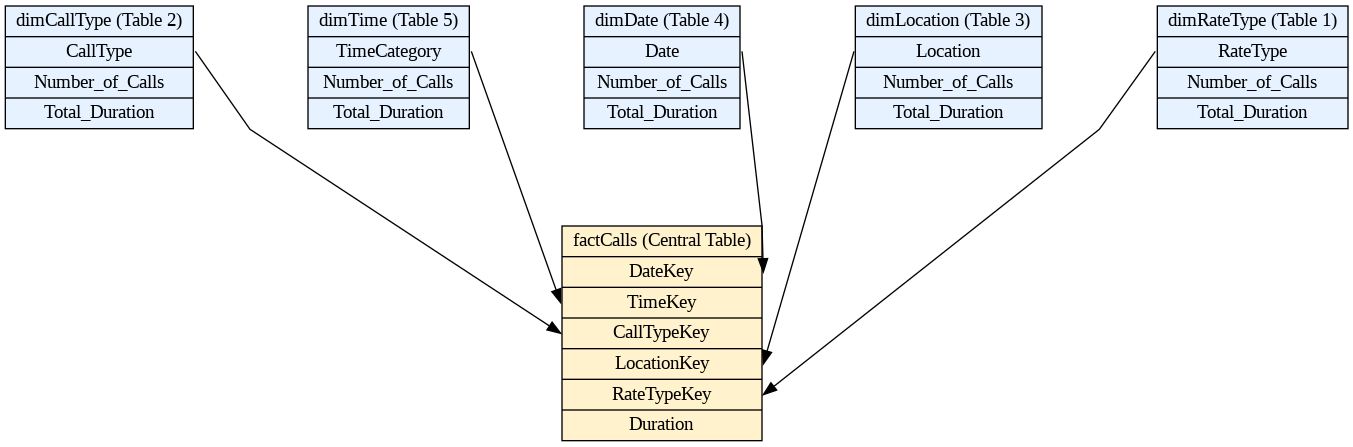

In [1]:
from graphviz import Digraph
from IPython.display import Image

dot = Digraph('StarSchema', format='png')
dot.attr(bgcolor='white', splines='polyline', ranksep='1.0', nodesep='1.2')

dot.node('FactCalls', '''{
factCalls (Central Table) |
<datekey> DateKey |
<timekey> TimeKey |
<calltypekey> CallTypeKey |
<locationkey> LocationKey |
<ratetypekey> RateTypeKey |
Duration
}''', shape='record', style='filled', fillcolor='#fff2cc')

dot.node('DimCallType', '''{
dimCallType (Table 2) |
<ctype> CallType |
Number_of_Calls |
Total_Duration
}''', shape='record', style='filled', fillcolor='#e6f2ff', pos='-1,1!')

dot.node('DimTime', '''{
dimTime (Table 5) |
<timecat> TimeCategory |
Number_of_Calls |
Total_Duration
}''', shape='record', style='filled', fillcolor='#e6f2ff', pos='1,1!')

dot.node('DimDate', '''{
dimDate (Table 4) |
<date> Date |
Number_of_Calls |
Total_Duration
}''', shape='record', style='filled', fillcolor='#e6f2ff', pos='-2,-1!')

dot.node('DimLocation', '''{
dimLocation (Table 3) |
<loc> Location |
Number_of_Calls |
Total_Duration
}''', shape='record', style='filled', fillcolor='#e6f2ff', pos='0,-1.5!')

dot.node('DimRateType', '''{
dimRateType (Table 1) |
<rate> RateType |
Number_of_Calls |
Total_Duration
}''', shape='record', style='filled', fillcolor='#e6f2ff', pos='2,-1!')

dot.edge('DimDate:date', 'FactCalls:datekey')
dot.edge('DimTime:timecat', 'FactCalls:timekey')
dot.edge('DimCallType:ctype', 'FactCalls:calltypekey')
dot.edge('DimLocation:loc', 'FactCalls:locationkey')
dot.edge('DimRateType:rate', 'FactCalls:ratetypekey')

dot.attr(overlap='false')
dot.render('star_schema_with_table_numbers', cleanup=True)
Image(filename='star_schema_with_table_numbers.png')